In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
data = pd.read_csv("time_series_30min_singleindex.csv")
# data = data.loc['1985-01-01':]

data.head()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


utc_timestamp        cet_cest_timestamp  \
0  2005-03-31 23:30:00  2005-04-01 01:30:00+0200   
1  2005-04-01 00:00:00  2005-04-01 02:00:00+0200   
2  2005-04-01 00:30:00  2005-04-01 02:30:00+0200   
3  2005-04-01 01:00:00  2005-04-01 03:00:00+0200   
4  2005-04-01 01:30:00  2005-04-01 03:30:00+0200   

   CY_load_actual_entsoe_transparency  CY_load_forecast_entsoe_transparency  \
0                                 NaN                                   NaN   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

   CY_wind_onshore_generation_actual  FR_load_actual_tso  \
0                                NaN                 NaN   
1                                NaN                 NaN   
2                                NaN                 NaN   
3                                NaN                 NaN   
4                                NaN                 NaN   

   FR_load_forecast_tso  FR_solar_generation_actual  \
0                   NaN                         NaN   
1                   NaN                         NaN   
2                   NaN                         NaN   
3                   NaN                         NaN   
4                   NaN                         NaN   

   FR_wind_onshore_generation_actual  GB_EAW_load_actual_tso  ...  \
0                                NaN                 28871.0  ...   
1                                NaN                 30340.0  ...   
2                                NaN                 31253.0  ...   
3                                NaN                 31325.0  ...   
4                                NaN                 31094.0  ...   

   GB_UKM_wind_onshore_capacity  GB_UKM_wind_onshore_generation_actual  \
0                        1371.0                                    NaN   
1                        1371.0                                    NaN   
2                        1371.0                                    NaN   
3                        1371.0                                    NaN   
4                        1371.0                                    NaN   

   GB_UKM_wind_onshore_profile  IE_load_actual_entsoe_transparency  \
0                          NaN                                 NaN   
1                          NaN                                 NaN   
2                          NaN                                 NaN   
3                          NaN                                 NaN   
4                          NaN                                 NaN   

   IE_load_forecast_entsoe_transparency  IE_wind_onshore_generation_actual  \
0                                   NaN                                NaN   
1                                   NaN                                NaN   
2                                   NaN                                NaN   
3                                   NaN                                NaN   
4                                   NaN                                NaN   

   IE_sem_load_actual_entsoe_transparency  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   IE_sem_load_forecast_entsoe_transparency  IE_sem_price_day_ahead  \
0                                       NaN                     NaN   
1                                       NaN                     NaN   
2                                       NaN                     NaN   
3                                       NaN                     NaN   
4                                       NaN                     NaN   

   IE_sem_wind_onshore_generation_actual  
0                                    N

In [2]:
# data['Date'] = data['Date'].astype('str')
# data['Time'] = data['Time'].astype('str')
# data['Date'] = data['Date'] + ' '+ data['Time']

# 44 DE_price_day_ahead,45 DE_solar_capacity, wind capacity 48
# dt = data[data.columns[3]]
# dt.head(20)

In [3]:
data.set_index('utc_timestamp', inplace=True)
# data = data.assign(Date=data.Date.dt.round('H'))
data.head()

cet_cest_timestamp  \
utc_timestamp                                   
2005-03-31 23:30:00  2005-04-01 01:30:00+0200   
2005-04-01 00:00:00  2005-04-01 02:00:00+0200   
2005-04-01 00:30:00  2005-04-01 02:30:00+0200   
2005-04-01 01:00:00  2005-04-01 03:00:00+0200   
2005-04-01 01:30:00  2005-04-01 03:30:00+0200   

                     CY_load_actual_entsoe_transparency  \
utc_timestamp                                             
2005-03-31 23:30:00                                 NaN   
2005-04-01 00:00:00                                 NaN   
2005-04-01 00:30:00                                 NaN   
2005-04-01 01:00:00                                 NaN   
2005-04-01 01:30:00                                 NaN   

                     CY_load_forecast_entsoe_transparency  \
utc_timestamp                                               
2005-03-31 23:30:00                                   NaN   
2005-04-01 00:00:00                                   NaN   
2005-04-01 00:30:00                                   NaN   
2005-04-01 01:00:00                                   NaN   
2005-04-01 01:30:00                                   NaN   

                     CY_wind_onshore_generation_actual  FR_load_actual_tso  \
utc_timestamp                                                                
2005-03-31 23:30:00                                NaN                 NaN   
2005-04-01 00:00:00                                NaN                 NaN   
2005-04-01 00:30:00                                NaN                 NaN   
2005-04-01 01:00:00                                NaN                 NaN   
2005-04-01 01:30:00                                NaN                 NaN   

                     FR_load_forecast_tso  FR_solar_generation_actual  \
utc_timestamp                                                           
2005-03-31 23:30:00                   NaN                         NaN   
2005-04-01 00:00:00                   NaN                         NaN   
2005-04-01 00:30:00                   NaN                         NaN   
2005-04-01 01:00:00                   NaN                         NaN   
2005-04-01 01:30:00                   NaN                         NaN   

                     FR_wind_onshore_generation_actual  \
utc_timestamp                                            
2005-03-31 23:30:00                                NaN   
2005-04-01 00:00:00                                NaN   
2005-04-01 00:30:00                                NaN   
2005-04-01 01:00:00                                NaN   
2005-04-01 01:30:00                                NaN   

                     GB_EAW_load_actual_tso  \
utc_timestamp                                 
2005-03-31 23:30:00                 28871.0   
2005-04-01 00:00:00                 30340.0   
2005-04-01 00:30:00                 31253.0   
2005-04-01 01:00:00                 31325.0   
2005-04-01 01:30:00                 31094.0   

                     GB_GBN_load_actual_entsoe_transparency  ...  \
utc_timestamp                                                ...   
2005-03-31 23:30:00                                     NaN  ...   
2005-04-01 00:00:00                                     NaN  ...   
2005-04-01 00:30:00                                     NaN  ...   
2005-04-01 01:00:00                                     NaN  ...   
2005-04-01 01:30:00                                     NaN  ...   

                     GB_UKM_wind_onshore_capacity  \
utc_timestamp                                       
2005-03-31 23:30:00                        1371.0   
2005-04-01 00:00:00                        1371.0   
2005-04-01 00:30:00                        1371.0   
2005-04-01 01:00:00                        1371.0   
2005-04-01 01:30:00                        1371.0   

                     GB_UKM_wind_onshore_generation_actual  \
utc_timestamp                                                
2005-03-31 23:30:00                                    NaN   
2005-04-01

In [4]:
data.index = pd.to_datetime(data.index)
# data = data.reset_index().drop_duplicates(subset='Date', keep='last').set_index('Date')

# data.head()

In [5]:
data = data['GB_EAW_load_actual_tso']
data = data[: int((len(data)*35)/100) ]
data.tail(10)

utc_timestamp
2010-03-03 22:30:00    33974.0
2010-03-03 23:00:00    31732.0
2010-03-03 23:30:00    30653.0
2010-03-04 00:00:00    31236.0
2010-03-04 00:30:00    31275.0
2010-03-04 01:00:00    31318.0
2010-03-04 01:30:00    30704.0
2010-03-04 02:00:00    30444.0
2010-03-04 02:30:00    30449.0
2010-03-04 03:00:00    29769.0
2010-03-04 03:30:00    29131.0
2010-03-04 04:00:00    28619.0
2010-03-04 04:30:00    28613.0
2010-03-04 05:00:00    29024.0
2010-03-04 05:30:00    30086.0
2010-03-04 06:00:00    33043.0
2010-03-04 06:30:00    35686.0
2010-03-04 07:00:00    38631.0
2010-03-04 07:30:00    40081.0
2010-03-04 08:00:00    40949.0
2010-03-04 08:30:00    41487.0
2010-03-04 09:00:00    42546.0
2010-03-04 09:30:00    42673.0
2010-03-04 10:00:00    42406.0
2010-03-04 10:30:00    42389.0
2010-03-04 11:00:00    42402.0
2010-03-04 11:30:00    42376.0
2010-03-04 12:00:00    42322.0
2010-03-04 12:30:00    41964.0
2010-03-04 13:00:00    41805.0
                        ...   
2010-03-05 09:30:00    43

In [6]:
data.columns = ['Energy Production']
data.columns


['Energy Production']

In [7]:
# dt = data[data['AT_load_actual_entsoe_power_statistics']==1.0]
# dt.head()

In [8]:
data.tail()

utc_timestamp
2010-03-05 22:00:00    34182.0
2010-03-05 22:30:00    32727.0
2010-03-05 23:00:00    30938.0
2010-03-05 23:30:00    30035.0
2010-03-06 00:00:00    30515.0
Name: GB_EAW_load_actual_tso, dtype: float64

In [9]:
len(data)
# 246865

86402

In [10]:
# data['Energy Production'] = data['Energy Production'].astype('float64')
data = data.astype('float64')
data.head()

utc_timestamp
2005-03-31 23:30:00    28871.0
2005-04-01 00:00:00    30340.0
2005-04-01 00:30:00    31253.0
2005-04-01 01:00:00    31325.0
2005-04-01 01:30:00    31094.0
Name: GB_EAW_load_actual_tso, dtype: float64

In [11]:
import numpy as np
print('Min', np.min(data))
print('Max', np.max(data))

Min 17726.0
Max 54221.0


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(data)
scaled = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [13]:
# !pip3 install plotly
# !pip3 install cufflinks

In [14]:
#importing Pandas 
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data.iplot(title="power")

In [15]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))


Min 0.0
Max 1.0


In [16]:
len(scaled)
scaled[:5]
# !pip3 install pyramid-arima


array([[0.3053843 ],
       [0.34563639],
       [0.37065351],
       [0.37262639],
       [0.36629675]])

In [17]:
train_size = int(len(scaled)*.7)
test_size = int(len(scaled - train_size))
train, test = scaled[:train_size, :], scaled[train_size:, :]

print(len(train), len(test))

60481 25921


In [18]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[(i+look_back), 0])
        
    return np.array(dataX), np.array(dataY)

In [19]:
look_back = 12
Xtrain, Ytrain = create_dataset(train, look_back)
Xtest, Ytest = create_dataset(test, look_back)

In [20]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))
print(Xtrain.shape)
print(Xtest.shape)

(60468, 12, 1)
(25908, 12, 1)


In [21]:
batch_size = 1000

# model = Sequential()
# layers = [1, 75, 100, prediction_steps]
# model.add(LSTM(layers[1], input_shape=(None, layers[0]), return_sequences=True))  # add first layer
# model.add(Dropout(0.2))  # add dropout for first layer
# model.add(LSTM(layers[2], return_sequences=False))  # add second layer
# model.add(Dropout(0.2))  # add dropout for second layer
# model.add(Dense(layers[3]))  # add output layer
# model.add(Activation('linear'))  # output layer with linear activation
    
    
# model = Sequential()
# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=1))
# model.add(Dense(1))
# model.compile(loss = 'mean_squared_error', optimizer='adam')
# model.fit(Xtrain, Ytrain, epochs=100, batch_size=batch_size, verbose = 2, shuffle=True)

model = Sequential()
model.add(LSTM(75, input_shape=(None, 1), return_sequences=True))  # add first layer
model.add(Dropout(0.2))  # add dropout for first layer
model.add(LSTM(100, return_sequences=False))  # add second layer
model.add(Dropout(0.2))  # add dropout for second layer
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(Xtrain, Ytrain, epochs=10, batch_size=batch_size, verbose = 2, shuffle=True)






Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 15s - loss: 0.0305
Epoch 2/10
 - 13s - loss: 0.0101
Epoch 3/10
 - 13s - loss: 0.0065
Epoch 4/10
 - 13s - loss: 0.0054
Epoch 5/10
 - 13s - loss: 0.0044
Epoch 6/10
 - 13s - loss: 0.0037
Epoch 7/10
 - 13s - loss: 0.0032
Epoch 8/10
 - 13s - loss: 0.0028
Epoch 9/10
 - 13s - loss: 0.0025
Epoch 10/10
 - 13s - loss: 0.0021


In [22]:
model.save('OPSD.h5')

In [23]:


import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(Xtrain, batch_size = batch_size)
# model.reset_states()
testPredict = model.predict(Xtest, batch_size = batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# trainPredict = scaler.inverse_transform(np.array(trainPredict).reshape(-1, 1))
# testPredict = scaler.inverse_transform(np.array(testPredict).reshape(-1, 1))


ytrain = scaler.inverse_transform([Ytrain])
ytest = scaler.inverse_transform([Ytest])
    
trainScore = math.sqrt(mean_squared_error(ytrain[0], trainPredict[:,0]))    
print("train Score", trainScore)

testScore = math.sqrt(mean_squared_error(ytest[0], testPredict[:,0]))    
print("test Score", testScore)
print(ytest[0])

train Score 1238.0195666723462
test Score 1253.1378163709355
[33220. 35445. 36716. ... 32727. 30938. 30035.]


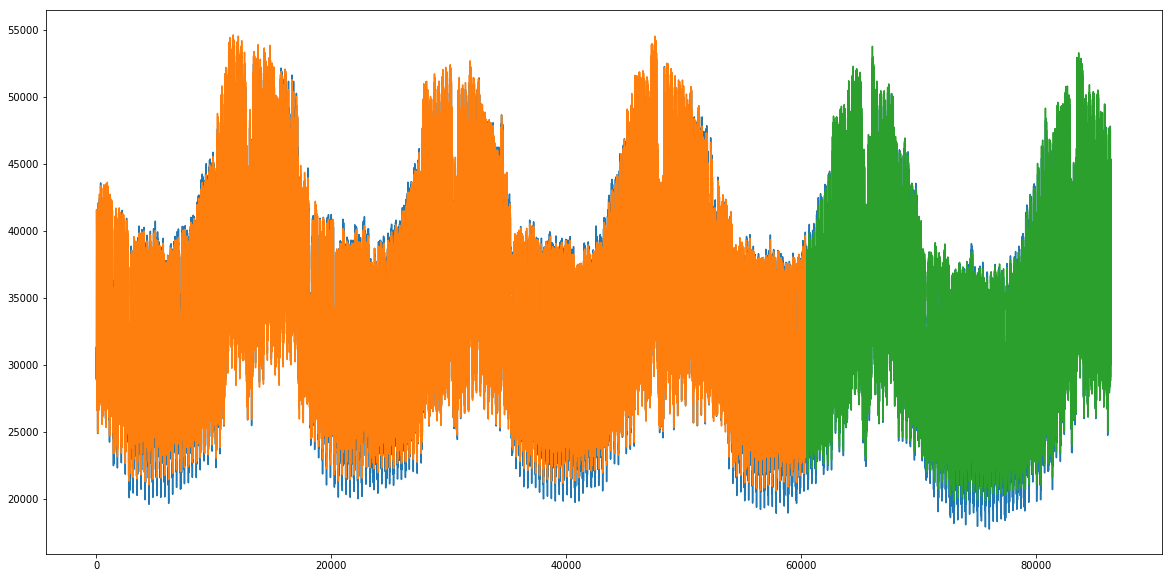

In [24]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict

plt.figure(figsize = (20, 10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()